In [151]:
# In investment portfolios, the primary goals include: 
# Minimize losses: identify and mitigate risk to protect capital 
# Optimize Returns: Ensure maximum potential return for a given risk level
# Ensure Long-Term Sustainability: Withstand market volatility and continue growing

In [152]:
%pip install yfinance
%pip install PyPortfolioOpt

import yfinance as yf
import pandas as pd
from pypfopt import EfficientFrontier, risk_models, expected_returns, DiscreteAllocation

# Define assets and the time period
assets = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'PLTR', 'META', 'TSLA', 'AMZN', 'NFLX', 'DIS']
start_date = '2024-07-01'
end_date = '2025-02-11'

# Download historical data
data = yf.download(assets, start=start_date, end=end_date)

# Ensure all requested assets are in the downloaded data
missing_assets = [asset for asset in assets if asset not in data.columns.get_level_values(1)]
if missing_assets:
    raise ValueError(f"Missing data for assets: {missing_assets}")

# Step 2: Compute Returns
returns = data.pct_change().dropna()

# Calculate daily returns
returns = data.pct_change().dropna()
# Calculate annual volatility
volatility = returns.std() * (252 ** 0.5)

# Calculate expected returns and the covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Optimize for the maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Ensure cleaned_weights is a dictionary
if not isinstance(cleaned_weights, dict):
    raise TypeError("cleaned_weights should be a dictionary")

# Calculate initial capital and the allocation
initial_capital = 1000000
latest_prices = data.iloc[-1]

# Ensure latest_prices is a pandas Series with asset tickers as index
if not isinstance(latest_prices, pd.Series):
    raise TypeError("latest_prices should be a pandas Series with asset tickers as index")

# Ensure latest_prices contains valid numeric data types
latest_prices = latest_prices.astype(float)

# Filter latest_prices to include only the assets in cleaned_weights
latest_prices = latest_prices[list(cleaned_weights.keys())]

# Filter cleaned_weights_dict to include only the tickers present in latest_prices
cleaned_weights_dict = {ticker: weight for ticker, weight in cleaned_weights.items() if ticker in latest_prices.index}

# Ensure the number of assets matches the number of weights
if len(cleaned_weights_dict) != len(latest_prices):
    raise ValueError("The number of assets does not match the number of weights")

# Ensure cleaned_weights_dict and latest_prices have matching tickers
if set(cleaned_weights_dict.keys()) != set(latest_prices.index):
    raise ValueError("The tickers in cleaned_weights_dict do not match those in latest_prices")

# Perform discrete allocation
da = DiscreteAllocation(cleaned_weights_dict, latest_prices, total_portfolio_value=initial_capital)
allocation, leftover = da.lp_portfolio()

# Print allocation results
print("Discrete allocation:", allocation)
print(f"Funds remaining: ${leftover:.2f}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  10 of 10 completed


Discrete allocation: {('Close', 'PLTR'): 4826, ('High', 'PLTR'): 713, ('Low', 'PLTR'): 1080, ('Open', 'PLTR'): 1785}
Funds remaining: $36406.06


/usr/local/lib/python3.11/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


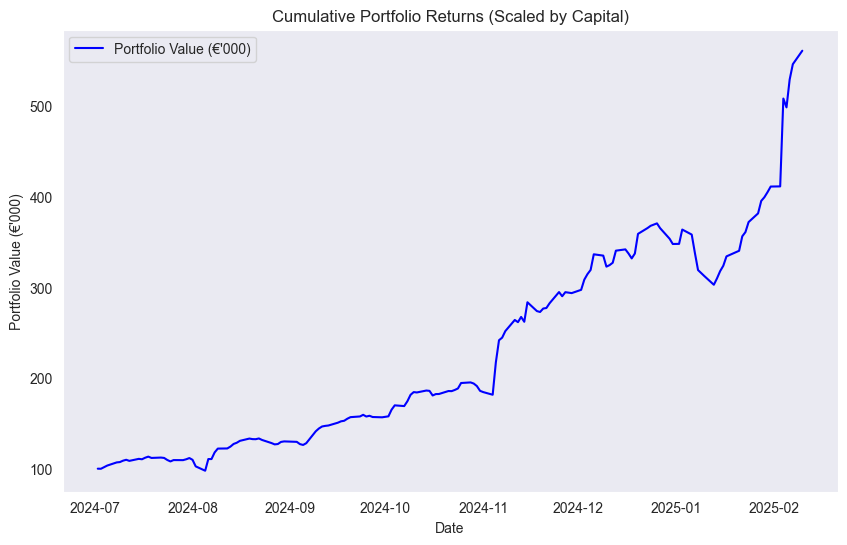

Discrete allocation: {('Close', 'PLTR'): '483', ('High', 'PLTR'): '71', ('Low', 'PLTR'): '108', ('Open', 'PLTR'): '178'}
Funds remaining: €0.00k


In [153]:
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import DiscreteAllocation

# Step 1: Compute portfolio returns
portfolio_returns = returns @ np.array(list(cleaned_weights.values()))

# Step 2: Compute cumulative portfolio returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Step 3: Perform Discrete Allocation
initial_capital = 100000  # Set initial investment amount
da = DiscreteAllocation(cleaned_weights, data.iloc[-1], total_portfolio_value=initial_capital)
allocation, leftover = da.lp_portfolio()

# Step 4: Compute actual portfolio value over time (in thousands)
portfolio_value = (initial_capital * cumulative_portfolio_returns) / 1000  # Convert to €'000

# Step 5: Plot cumulative portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label="Portfolio Value (€'000)", color="blue")
plt.title('Cumulative Portfolio Returns (Scaled by Capital)')
plt.xlabel('Date')
plt.ylabel("Portfolio Value (€'000)")
plt.legend()
plt.grid()
plt.show()

# Print Discrete Allocation Results (Formatted)
formatted_allocation = {k: f"{v:,}" for k, v in allocation.items()}  # Format with commas
print("Discrete allocation:", formatted_allocation)
print("Funds remaining: €{:.2f}k".format(leftover / 1000))  # Convert leftover to thousands


Advanced Technics in Risk Management
Monte Carlo simulations: Predicting Future Scenarios
Monte Carlo simulations use random sampling to model the probability of different outcomes. 

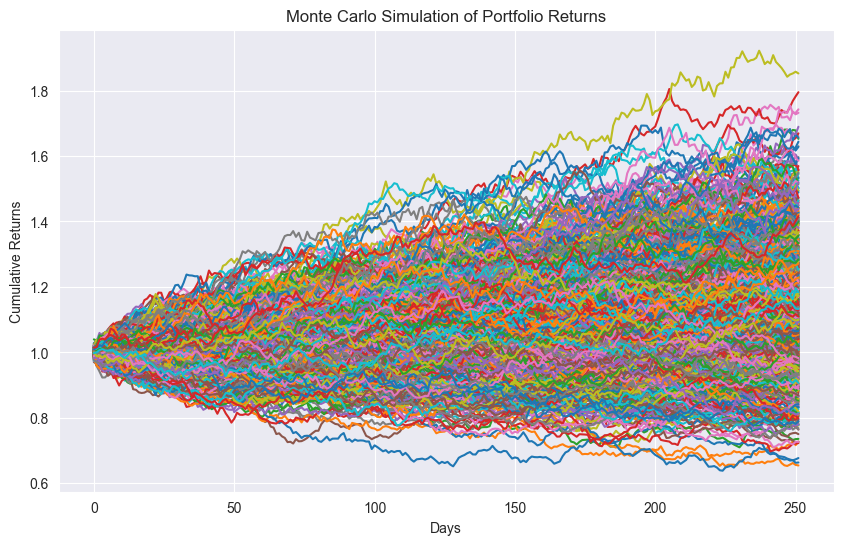

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Define number of simulations and time horizon
n_simulations = 1000
n_days = 252

# Assuming mu and volatility are defined
#mu = np.array([0.0005])  # Example mean return
#volatility = np.array([0.01])  # Example volatility

# Simulate portfolio returns
daily_returns = np.random.normal(mu.mean(), volatility.mean(), (n_days, n_simulations))

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + daily_returns, axis=0)

# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns)
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.show()

Sorted Final Returns:
[0.6500283  0.67317214 0.70624373 0.7065168  0.71328839 0.72907566
 0.73466957 0.74111744 0.75983075 0.76111783 0.76115208 0.76322336
 0.76908477 0.77096193 0.77241604 0.77832718 0.77970509 0.7874413
 0.78883332 0.79681762 0.79791152 0.79855992 0.80226487 0.80372631
 0.80633078 0.80804703 0.80858543 0.81719411 0.8171945  0.8191273
 0.82180267 0.82232989 0.82245408 0.82387903 0.82565822 0.82668709
 0.82684915 0.83584026 0.83930601 0.84004461 0.84085521 0.84768928
 0.84823388 0.84858871 0.84896959 0.85170422 0.85205193 0.86127453
 0.86329713 0.86359413 0.86376743 0.86454321 0.87045609 0.87258322
 0.87744923 0.87882599 0.87895983 0.88025792 0.88059521 0.88180741
 0.88256775 0.88821656 0.88931845 0.89284536 0.89285838 0.89339298
 0.89366548 0.89522604 0.89689381 0.8969188  0.89782422 0.89798593
 0.90006394 0.90018585 0.90080884 0.90180534 0.90266131 0.90514127
 0.90641884 0.91075652 0.91142826 0.91355074 0.91401331 0.914399
 0.91491975 0.91751851 0.91969852 0.9200942 

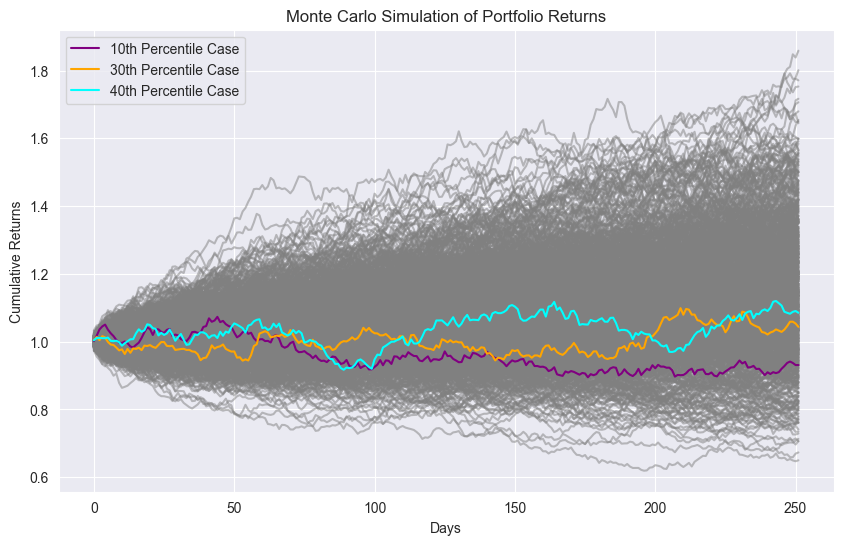

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Define number of simulations and time horizon
n_simulations = 1000
n_days = 252

# Assuming mu and volatility are defined
mu = np.array([0.0005])  # Example mean return
volatility = np.array([0.01])  # Example volatility

# Simulate portfolio returns
daily_returns = np.random.normal(mu.mean(), volatility.mean(), (n_days, n_simulations))

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + daily_returns, axis=0)

# Identify specific percentile scenarios
final_returns = cumulative_returns[-1, :]
sorted_final_returns = np.sort(final_returns)
percentile_10_index = int(0.1 * n_simulations)
percentile_30_index = int(0.3 * n_simulations)
percentile_40_index = int(0.4 * n_simulations)

# Print the sorted final returns for verification
print("Sorted Final Returns:")
print(sorted_final_returns)

# Print the final cumulative returns for specific percentile cases
print(f"10th Percentile Case Final Return (90% probability): {sorted_final_returns[percentile_10_index]}")
print(f"30th Percentile Case Final Return (70% probability): {sorted_final_returns[percentile_30_index]}")
print(f"40th Percentile Case Final Return (60% probability): {sorted_final_returns[percentile_40_index]}")

# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, color='grey', alpha=0.5)
plt.plot(cumulative_returns[:, np.argsort(final_returns)[percentile_10_index]], color='purple', label='10th Percentile Case')
plt.plot(cumulative_returns[:, np.argsort(final_returns)[percentile_30_index]], color='orange', label='30th Percentile Case')
plt.plot(cumulative_returns[:, np.argsort(final_returns)[percentile_40_index]], color='cyan', label='40th Percentile Case')
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

Stress Testing: Evaluating Extreme Market Conditions
# Define stress scenarios (e.g., mraket crash, interest rate hike)

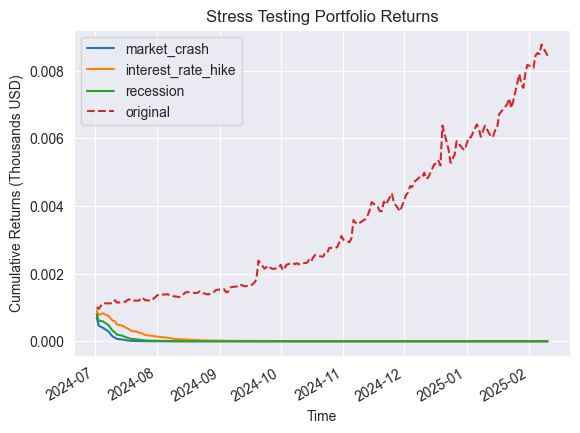

In [156]:
import matplotlib.pyplot as plt

# Define stress scenarios
stress_scenarios = {'market_crash': -0.3, 'interest_rate_hike': -0.1, 'recession': -0.2}

# Calculate the portfolio's cumulative returns
portfolio_returns = returns.mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod()

# Convert cumulative returns to thousands of USD
cumulative_returns_thousands = cumulative_returns / 1000

# Apply stress scenarios to the portfolio's cumulative returns
for scenario, shock in stress_scenarios.items():
    stressed_returns = portfolio_returns + shock
    stressed_cumulative_returns = (1 + stressed_returns).cumprod()
    stressed_cumulative_returns_thousands = stressed_cumulative_returns / 1000
    stressed_cumulative_returns_thousands.plot(label=scenario)

# Plot the original cumulative returns for comparison
cumulative_returns_thousands.plot(label='original', linestyle='--')

plt.title('Stress Testing Portfolio Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns (Thousands USD)')
plt.legend()
plt.show()

Machine Learning: Enhancing Risk Assessments
Use machine learning techniqs to identify patterns and predict future market movements. 

In [172]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Example data with stock tickers
np.random.seed(42)
tickers = ['NVDA', 'PLTR', 'META', 'TSLA', 'NFLX', 'DIS']
returns = pd.DataFrame(np.random.normal(0.0005, 0.01, (252, len(tickers))), columns=tickers)

# Define the assets you want to forecast
assets = ['NVDA', 'PLTR', 'META', 'TSLA', 'NFLX', 'DIS']

# Train a machine learning model to predict future returns for the selected assets
model = RandomForestRegressor(n_estimators=100)
model.fit(returns[assets].iloc[:-1], returns[assets].iloc[1:])

# Predict returns for the next day using the last available returns of the selected assets
last_row = pd.DataFrame(returns[assets].iloc[-1]).T  # Convert the last row to a DataFrame
predicted_returns = model.predict(last_row)

# Create a DataFrame with assets and their predicted returns
predicted_returns_df = pd.DataFrame(predicted_returns, columns=assets)

# Print the assets and their predicted returns for the next day
print("Predicted returns for the next day for selected assets:")
print(predicted_returns_df.T)

Predicted returns for the next day for selected assets:
             0
NVDA  0.002194
PLTR  0.000008
META  0.002013
TSLA -0.000091
NFLX  0.003143
DIS   0.004195
